In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Conv1D, MaxPooling1D, AveragePooling1D, Flatten, Dense, Dropout

In [2]:
# Carregando Dataset
def dataset():
    import pandas_datareader.data as web
    import datetime as dt

    end = dt.datetime(2020, 11, 1)
    start = dt.datetime(2015, 1, 1)

    df = web.DataReader("FB", 'yahoo', start, end)

    df = df.reset_index()
    df = df.drop(columns=['Open','Date','High','Low','Volume','Adj Close'])
    df = df.rename(columns={'Close': 'Close 0'})

    def window (df, w):
        for i in range(1,w):
            df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
        return df

    new_df = window(df,5)
    new_df = new_df.rename(columns={'Close 0': 'Target'})
    new_df.dropna(inplace=True)

    limit = int(len(new_df)*0.75)

    X = new_df.loc[:,['Close 1','Close 2','Close 3','Close 4']]
    y = new_df.loc[:,'Target'].tolist()

    X = np.array(X)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    y = np.array(y)

    X_train, X_test = X[:limit], X[limit:]
    y_train, y_test = y[:limit], y[limit:]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = dataset()

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Read timed out.

In [3]:
def read_df():
    df_test = pd.read_csv('Datasets/Acoes/AAPL_3_test.csv')
    df_test.drop(columns='Unnamed: 0', inplace=True)

    df_train = pd.read_csv('Datasets/Acoes/AAPL_3_train.csv')
    df_train.drop(columns='Unnamed: 0', inplace=True)

    X_test = df_test.loc[:, ['Close 1','Close 2','Close 3','Close 4']]
    y_test = df_test.loc[:, 'Target'].tolist()

    X_train = df_train.loc[:, ['Close 1','Close 2','Close 3','Close 4']]
    y_train = df_train.loc[:, 'Target'].tolist()
    
    X_train = np.array(X_train)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

    y_train = np.array(y_train)
    
    X_test = np.array(X_test)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    y_test = np.array(y_test)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = read_df()

In [80]:
model = Sequential()

model.add(Flatten())

model.add(Dense(50))

model.add(Dense(25))

model.add(Dense(15))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [81]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 474.1503
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 50.5716
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 14.3963
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 9.9259
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 9.4395
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 9.4039
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 9.2027
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 9.8735
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 8.7179
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 8.6356
Epoch 11/100
18/18 [==============================] - 0s 2ms/step - loss: 8.2822
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 8.2133
Epoch 13/100
18/18 [=============

In [84]:
def results():
    yhat = model.predict(X_test)
    model.evaluate(X_test, y_test)
    plt.figure(figsize=(12,6))
    plt.plot(y_test)
    plt.plot(yhat)
    plt.grid()

### GRID SEARCH

In [26]:
# importar keras wrapper
from keras.wrappers.scikit_learn import KerasRegressor

#Grid search
from sklearn.model_selection import GridSearchCV

import keras

In [56]:
#Criando modelo base

def create_model(optimizer='adam'):
    
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(20))
    model.add(Dense(10))
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer=optimizer, 
                  metrics=[keras.metrics.MeanSquaredError()])
    return model

In [57]:
# batch_size e epochs
batch_size = [10,20]
epochs = [10,50]
optimizer = ['SGD','Adagrad','Nadam']

In [58]:
#Criando dicionario de parametros
param_grid = dict(batch_size = batch_size, epochs = epochs,
                 optimizer = optimizer)

In [59]:
#Usando keras wrapper para transformar rede em um modelo
modelo = KerasRegressor(build_fn = create_model, verbose=1)

In [61]:
#aplicando grid search
grid = GridSearchCV(estimator=modelo, param_grid = param_grid,
                    n_jobs=-1, cv = 2)

In [62]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/50
29/29 [==============================] - 0s 1ms/step - loss: 4886.6138 - mean_squared_error: 4886.6138
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 22.8355 - mean_squared_error: 22.8355
Epoch 3/50
29/29 [==============================] - 0s 1ms/step - loss: 3.5095 - mean_squared_error: 3.5095
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 3.0926 - mean_squared_error: 3.0926
Epoch 5/50
29/29 [==============================] - 0s 1ms/step - loss: 3.1070 - mean_squared_error: 3.1070
Epoch 6/50
29/29 [==============================] - 0s 1ms/step - loss: 3.0951 - mean_squared_error: 3.0951
Epoch 7/50
29/29 [==============================] - 0s 1ms/step - loss: 3.0809 - mean_squared_error: 3.0809
Epoch 8/50
29/29 [==============================] - 0s 1ms/step - loss: 3.0954 - mean_squared_error: 3.0954
Epoch 9/50
29/29 [==============================] - 0s 1ms/step - loss: 3.1089 - mean_squared_error: 3.1089
Epoch 10/50
29/29 [=

In [63]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -4.153463 using {'batch_size': 20, 'epochs': 50, 'optimizer': 'Nadam'}


In [64]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

nan (nan) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'SGD'}
-24.178542 (14.822816) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'Adagrad'}
-6.345940 (1.727998) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'Nadam'}
nan (nan) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'SGD'}
-4.538258 (0.518261) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adagrad'}
-4.815184 (0.085543) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Nadam'}
nan (nan) with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'SGD'}
-1856.951749 (1852.273592) with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'Adagrad'}
-8.396611 (0.084488) with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'Nadam'}
nan (nan) with: {'batch_size': 20, 'epochs': 50, 'optimizer': 'SGD'}
-5.128087 (1.029531) with: {'batch_size': 20, 'epochs': 50, 'optimizer': 'Adagrad'}
-4.153463 (1.407403) with: {'batch_size': 20, 'epochs': 50, 'optimizer': 'Nadam'}


10/10 [==============================] - 0s 12ms/step


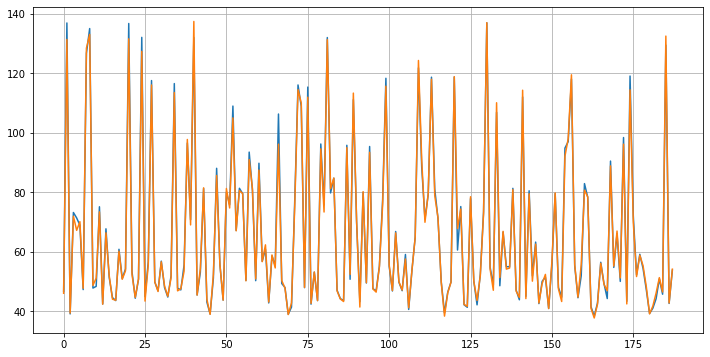

In [65]:
yhat = grid_result.predict(X_test)
plt.figure(figsize=(12,6))
plt.plot(y_test)
plt.plot(yhat)
plt.grid()